In [ ]:
# Set dataset path (for Kaggle environment)
dataset_path = '/kaggle/input/human-activity-recognition/'  

df_csv_path = f'{dataset_path}/Training_set.csv'

df_folder = f'{dataset_path}/train'



# Print paths for verification
print(f"Train CSV Path: {df_csv_path}")
print(f"Train Folder Path: {df_folder}")



Train CSV Path: /kaggle/input/human-activity-recognition//Training_set.csv
Train Folder Path: /kaggle/input/human-activity-recognition//train


In [ ]:
# Load CSVs
import pandas as pd
df = pd.read_csv('/kaggle/input/human-activity-recognition/Training_set.csv')


# Append full path to filenames
df['filename'] = '/kaggle/input/human-activity-recognition/train-20250414T123037Z-001/train/' + df['filename']


In [ ]:
df.head()

,filename,label
0,/kaggle/input/human-activity-recognition/train...,sitting
1,/kaggle/input/human-activity-recognition/train...,using_laptop
2,/kaggle/input/human-activity-recognition/train...,hugging
3,/kaggle/input/human-activity-recognition/train...,sleeping
4,/kaggle/input/human-activity-recognition/train...,using_laptop


In [ ]:
df['label'].value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

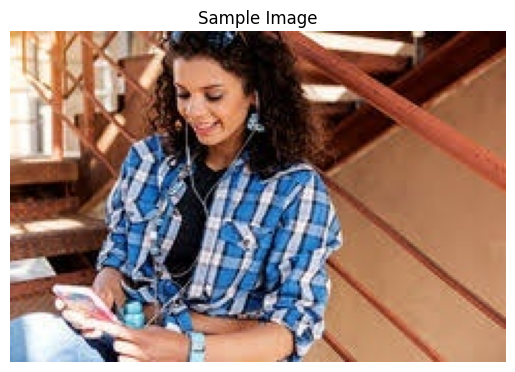

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img_path = df['filename'][0]
img = Image.open(img_path)

plt.imshow(img)
plt.axis('off')
plt.title("Sample Image")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

test_gen = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 6844 validated image filenames belonging to 15 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3236 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 1685 validated image filenames belonging to 15 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 835 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(train_gen.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base_model layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Training
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=25,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744643767.565115     100 service.cc:148] XLA service 0x78fe340027c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744643767.567829     100 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744643767.567853     100 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744643768.546030     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/214 ━━━━━━━━━━━━━━━━━━━━ 1:00:52 17s/step - accuracy: 0.0312 - loss: 3.4884

I0000 00:00:1744643773.409693     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


214/214 ━━━━━━━━━━━━━━━━━━━━ 147s 610ms/step - accuracy: 0.1606 - loss: 2.6538 - val_accuracy: 0.4570 - val_loss: 1.8122
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 79s 358ms/step - accuracy: 0.4532 - loss: 1.7598 - val_accuracy: 0.5430 - val_loss: 1.4620
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 76s 343ms/step - accuracy: 0.5411 - loss: 1.4396 - val_accuracy: 0.5703 - val_loss: 1.3428
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 77s 347ms/step - accuracy: 0.5708 - loss: 1.3494 - val_accuracy: 0.5905 - val_loss: 1.2791
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 76s 344ms/step - accuracy: 0.5906 - loss: 1.2715 - val_accuracy: 0.6101 - val_loss: 1.2296
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 76s 345ms/step - accuracy: 0.6194 - loss: 1.1863 - val_accuracy: 0.6107 - val_loss: 1.2306
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 76s 344ms/step - accuracy: 0.6278 - loss: 1.1528 - val_accuracy: 0.6273 - val_loss: 1.1977
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 76s 345ms/step - accuracy: 0.6356 - loss: 1.1180 - va

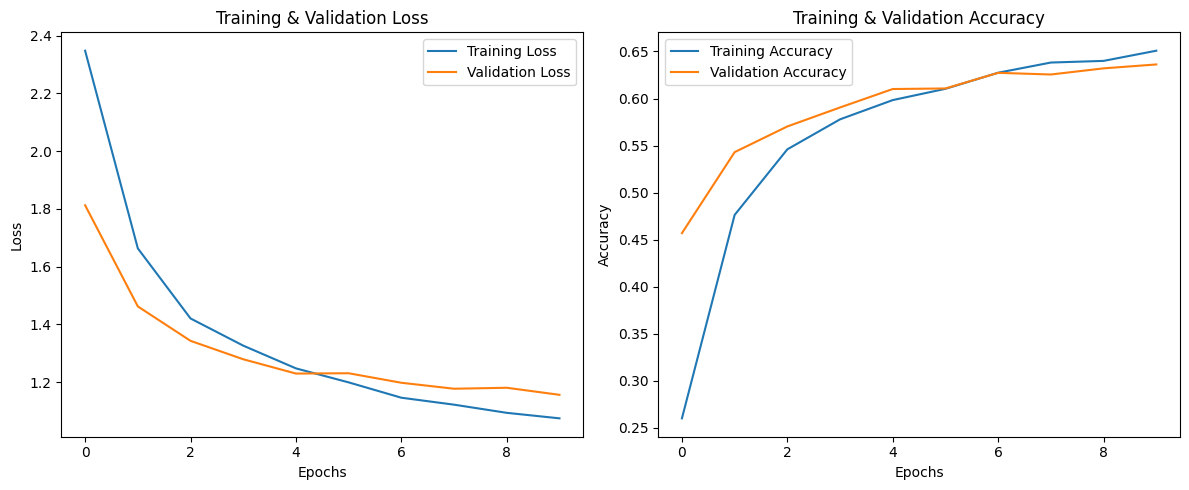

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history object
history_dict = history.history

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy (if available)
if 'accuracy' in history_dict:  # Use 'acc' for older TensorFlow versions
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['accuracy'], label='Training Accuracy')
    plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step


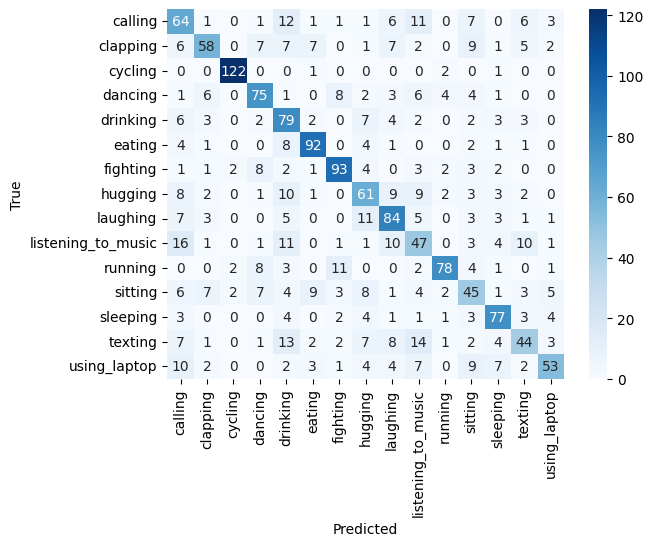

                    precision    recall  f1-score   support

           calling       0.46      0.56      0.51       114
          clapping       0.67      0.52      0.59       112
           cycling       0.95      0.97      0.96       126
           dancing       0.68      0.68      0.68       111
          drinking       0.49      0.70      0.58       113
            eating       0.77      0.81      0.79       114
          fighting       0.76      0.76      0.76       122
           hugging       0.53      0.55      0.54       111
          laughing       0.61      0.68      0.64       123
listening_to_music       0.42      0.44      0.43       106
           running       0.85      0.71      0.77       110
           sitting       0.45      0.42      0.44       107
          sleeping       0.71      0.75      0.73       103
           texting       0.55      0.40      0.47       109
      using_laptop       0.73      0.51      0.60       104

          accuracy                    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

preds = model.predict(test_gen)
y_pred = preds.argmax(axis=1)
y_true = test_gen.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices,
            yticklabels=test_gen.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))


## Fine Tuning to increase the accuracy.

In [ ]:

# Fine-tuning the model
# Unfreeze the last 30 layers of the base model
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Re-compile the model with a smaller learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train again with fine-tuning
history_finetune = model.fit(
    train_generator,
    epochs=50,  # Continue training for more epochs
    validation_data=test_gen,  
    callbacks=[early_stop]
)


Epoch 1/30
214/214 ━━━━━━━━━━━━━━━━━━━━ 109s 414ms/step - accuracy: 0.3119 - loss: 2.1825 - val_accuracy: 0.5246 - val_loss: 1.5190
Epoch 2/30
214/214 ━━━━━━━━━━━━━━━━━━━━ 80s 363ms/step - accuracy: 0.3719 - loss: 1.9885 - val_accuracy: 0.5365 - val_loss: 1.4734
Epoch 3/30
214/214 ━━━━━━━━━━━━━━━━━━━━ 81s 367ms/step - accuracy: 0.4114 - loss: 1.8656 - val_accuracy: 0.5549 - val_loss: 1.4161
Epoch 4/30
214/214 ━━━━━━━━━━━━━━━━━━━━ 79s 355ms/step - accuracy: 0.4296 - loss: 1.8085 - val_accuracy: 0.5608 - val_loss: 1.3819
Epoch 5/30
214/214 ━━━━━━━━━━━━━━━━━━━━ 79s 356ms/step - accuracy: 0.4325 - loss: 1.7483 - val_accuracy: 0.5685 - val_loss: 1.3470
Epoch 6/30
214/214 ━━━━━━━━━━━━━━━━━━━━ 78s 353ms/step - accuracy: 0.4647 - loss: 1.6768 - val_accuracy: 0.5804 - val_loss: 1.3078
Epoch 7/30
214/214 ━━━━━━━━━━━━━━━━━━━━ 78s 355ms/step - accuracy: 0.4788 - loss: 1.6376 - val_accuracy: 0.5887 - val_loss: 1.2821
Epoch 8/30
214/214 ━━━━━━━━━━━━━━━━━━━━ 80s 363ms/step - accuracy: 0.4926 - loss: 

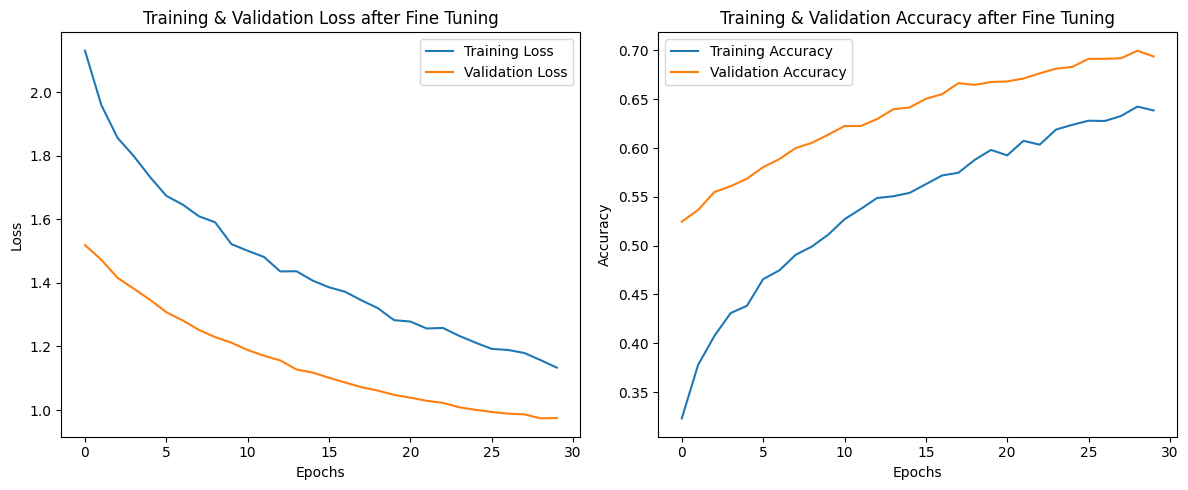

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history object
history_dict = history_finetune.history

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss after Fine Tuning')
plt.legend()

# Plot Accuracy (if available)
if 'accuracy' in history_dict:  # Use 'acc' for older TensorFlow versions
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['accuracy'], label='Training Accuracy')
    plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy after Fine Tuning')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save("model.keras")  


In [ ]:
import json

class_names = list(train_gen.class_indices.keys())

with open("class_names.json", "w") as f:
    json.dump(class_names, f)
